# Reading Data

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style='white')
sns.set(rc = {'figure.figsize':(20,6)}, font="Arial", font_scale=1.3)


In [150]:
df_1718 = pd.read_csv('Data/transfermarkt_fbref_201718.csv', delimiter=';', index_col=0)
df_1819 = pd.read_csv('Data/transfermarkt_fbref_201819.csv', delimiter=';', index_col=0)
df_1920 = pd.read_csv('Data/transfermarkt_fbref_201920.csv', delimiter=';', index_col=0)

C:\Users\ubfil\anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (395) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [151]:
df_1718.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [152]:
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

In [153]:
df = pd.concat([df_1718, df_1819, df_1920])
df.shape

(7108, 400)

In [154]:
df.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
379.0,Burgui,es ESP,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2530.0,Raphaël Varane,fr FRA,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,...,83.3,45.4,37.9,1.00,66161,1.0,1.0,0.0,201718#,2017
721.0,Rubén Duarte,es ESP,DF,Alavés,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2512.0,Samuel Umtiti,fr FRA,DF,Barcelona,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,...,78.3,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#,2017
882.0,Manu García,es ESP,MF,Alavés,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7108 entries, 379.0 to 2615.0
Columns: 400 entries, player to year
dtypes: float64(390), int64(1), object(9)
memory usage: 21.7+ MB


In [156]:
df.index = range(len(df))

### Creating Test Set

In [157]:
df = df.dropna(subset=['value'])
df.index = range(len(df))

In [158]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['year']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [159]:
df_train = train_set.copy()

# Data Visualization

### Categorical Data

In [160]:
df_cat = train_set.select_dtypes(include=['object'])
df_cat.drop(columns=['Attendance','Season'], axis=1, inplace=True)

C:\Users\ubfil\anaconda3\envs\env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [161]:
df_num = train_set.select_dtypes(exclude=['object'])

In [162]:
train_set.describe()

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,year
count,5580.000000,5580.000000,5.580000e+03,5579.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,...,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5258.000000,5580.000000
mean,25.341577,1991.291039,1.023091e+07,181.976878,19.035663,14.967384,1342.801613,1.861828,1.283513,0.174731,...,50.129032,1.372072,48.354785,48.428172,-0.072151,-0.000602,0.184588,0.010215,0.000380,2018.059140
std,4.448123,46.405457,1.660618e+07,9.799587,11.224125,11.243162,975.770576,3.464786,2.073980,0.751963,...,17.259463,0.460014,12.724821,10.403205,19.168608,0.524226,0.387998,0.100561,0.019501,0.833998
min,0.000000,0.000000,5.000000e+01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,13.000000,0.420000,26.800000,22.700000,-41.500000,-1.090000,0.000000,0.000000,0.000000,2017.000000
25%,22.000000,1989.000000,1.500000e+06,178.000000,9.000000,4.000000,450.000000,0.000000,0.000000,0.000000,...,39.000000,1.060000,39.600000,41.500000,-13.300000,-0.360000,0.000000,0.000000,0.000000,2017.000000
50%,25.000000,1993.000000,4.000000e+06,183.000000,20.000000,14.000000,1238.000000,0.000000,0.000000,0.000000,...,48.000000,1.290000,45.900000,48.400000,-2.900000,-0.080000,0.000000,0.000000,0.000000,2018.000000
75%,28.000000,1996.000000,1.200000e+07,187.000000,29.000000,24.000000,2136.000000,2.000000,2.000000,0.000000,...,59.000000,1.620000,54.700000,55.300000,10.100000,0.290000,0.000000,0.000000,0.000000,2019.000000
max,41.000000,2003.000000,2.000000e+08,203.000000,38.000000,38.000000,3420.000000,36.000000,21.000000,14.000000,...,100.000000,2.630000,93.000000,84.100000,58.300000,1.780000,1.000000,1.000000,1.000000,2019.000000


In [163]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

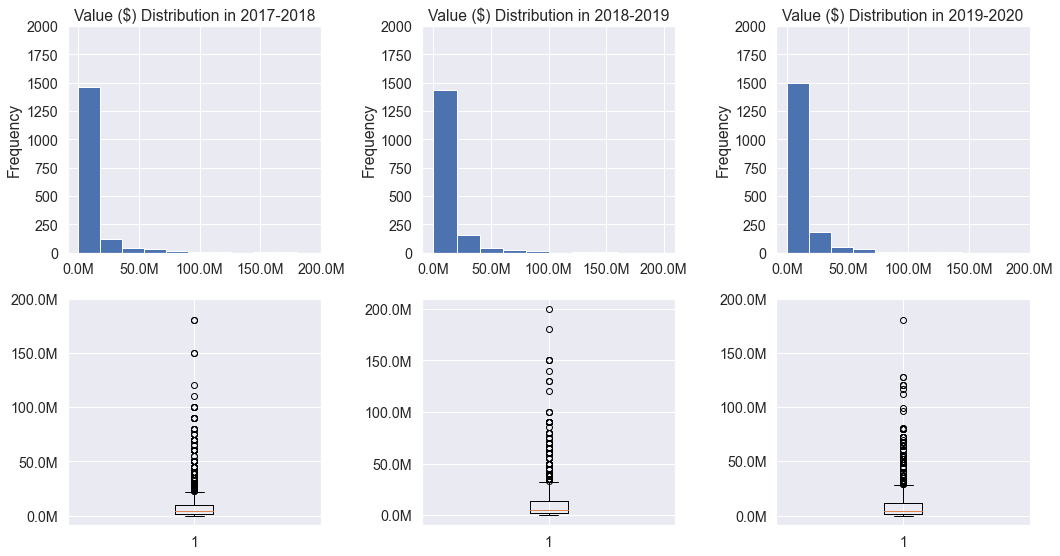

In [164]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))

for i, yr in enumerate([2017, 2018, 2019]):
    df_yr = train_set[train_set['year'] == yr].dropna()
    

    ax[0,i].hist(df_yr.value)
    ax[0,i].set_title('Value ($) Distribution in %i-%i' % (yr, yr+1))
    ax[0,i].set_xticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
    ax[0,i].set_ylabel('Frequency')
    ax[0,i].set_yticks(np.arange(0, 2250, 250))
    ax[0,i].xaxis.set_major_formatter(formatter)
    
    ax[1,i].boxplot(df_yr.value)
    ax[1,i].yaxis.set_major_formatter(formatter)
    ax[1,i].set_yticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
        
    
plt.tight_layout()



In [165]:
from scipy import stats

train_set = train_set[(np.abs(stats.zscore(train_set["value"])) < 3)]

In [166]:
df_cat

,player,nationality,position,squad,position2,foot,league
3706,Federico Dimarco,it ITA,DF,Parma,Defender - Left-Back,left,Serie A
5395,Stefano Sensi,it ITA,"MF,FW",Inter,Midfielder - Central Midfield,right,Serie A
5821,Dylan Bronn,tn TUN,DF,Metz,Defender - Centre-Back,right,Ligue 1
5683,Oumar Solet,fr FRA,DF,Lyon,Defender - Centre-Back,right,Ligue 1
4193,Fernando Calero,es ESP,DF,Valladolid,Defender - Centre-Back,right,La Liga
...,...,...,...,...,...,...,...
5036,Miguel Atienza,es ESP,MF,Eibar,Midfielder - Central Midfield,right,La Liga
4676,Andrea Poli,it ITA,MF,Bologna,Midfielder - Central Midfield,right,Serie A
1767,Nicholas Pierini,it ITA,"FW,MF",Sassuolo,attack - Left Winger,right,Serie A
5899,Gil BastiĂŁo Dias,pt POR,"DF,MF",Monaco,Forward - Right Winger,left,Ligue 1


In [167]:
def format_nationality(x):
    return str(x)[-3:]

train_set['nationality'] = train_set["nationality"].map(format_nationality)

In [168]:
nation_count = pd.DataFrame(train_set.nationality.value_counts())

In [169]:
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))

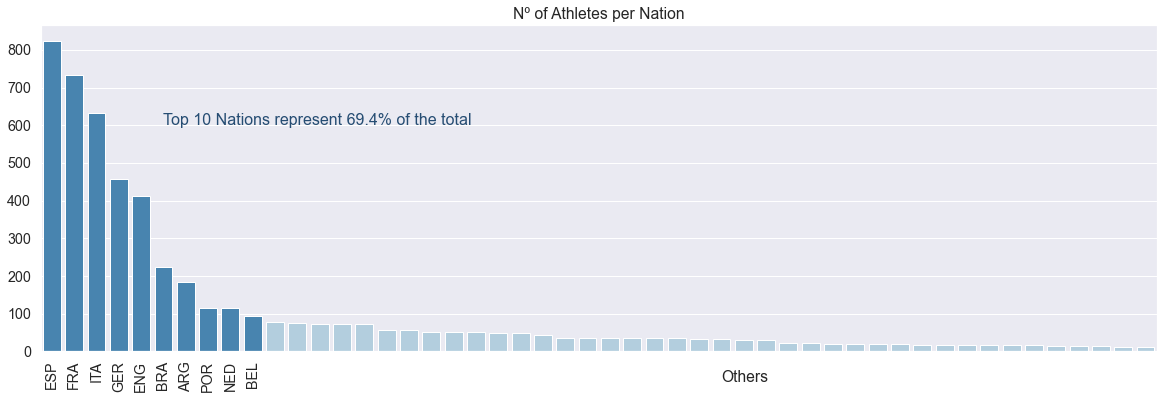

In [170]:
import matplotlib.patches as patches

g = sns.barplot(x="country", y="nationality", hue="hue", dodge=False,
                hue_order=[10,0],
                data=nation_count[:50],
                palette="Blues_r",
                )

g.set_title("Nº of Athletes per Nation")
g.set_ylabel('')
g.set_xlabel('')

plt.xticks(rotation=90)

plt.text(5, 600, 'Top 10 Nations represent %.1f%% of the total' % (nation_count.nationality[:10].sum()/nation_count.nationality.sum()*100),
         color='#264d73', fontsize=16)
plt.text(30, -80, "Others")

for ind, label in enumerate(g.get_xticklabels()):
    if ind < 10:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

g.legend_.remove()
plt.show()

In [171]:
important_nations = nation_count.country[:10].tolist()

train_set["nationality"] = train_set.nationality.map(lambda x: x if x in important_nations else "Other")

In [172]:
train_set.position.unique()

array(['DF', 'MF,FW', 'GK', 'MF', 'FW', 'MF,DF', 'FW,MF', 'DF,MF',
       'FW,DF', 'DF,FW', '0', 'GK,MF'], dtype=object)

In [173]:
train_set.position.replace('0', None, inplace=True)
train_set = train_set.dropna(axis=0, subset=['position'])

In [174]:
def format_position_1(x):
    if len(x) > 2:
        return x[:2]
    else:
        return x
    
def format_position_2(y):
    if len(y) > 2:
        return y[3:]
    else:
        return 'None'
    
train_set['position_1'] = train_set.position.map(format_position_1)
train_set['position_2'] = train_set.position.map(format_position_2)
train_set = train_set.drop(columns=['position'], axis=1)

In [175]:
def show_values_on_bars(axs, h_v="v", space=0.4): # function by https://stackoverflow.com/users/7898385/secant-zhang
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_formatted(axs, h_v="v", space=0.4): 
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, formatter(value), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, formatter(value), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

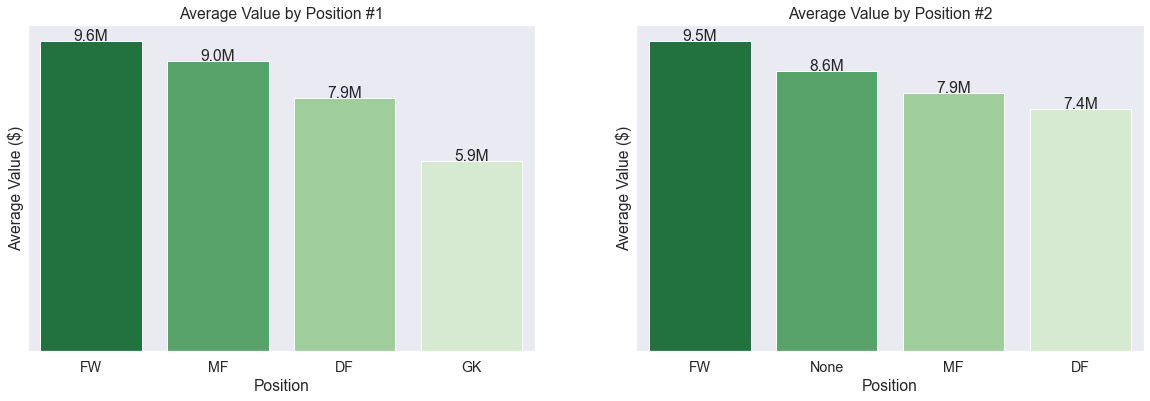

In [176]:
fig, axs = plt.subplots(1,2)

for idx, pos in enumerate(["position_1", "position_2"]):
    by_position = train_set[["value", pos]].groupby(pos).mean().sort_values(by='value', ascending=False)
    
    g = sns.barplot(x=by_position.index, y=by_position.value,
                palette="Greens_r", ax=axs[idx])

    g.set_title("Average Value by Position #" + str(idx+1))
    g.set_ylabel('Average Value ($)')
    g.set_xlabel('Position')

    g.set(yticks=[]) 

    show_values_on_bars_formatted(g, h_v="v")

plt.show()

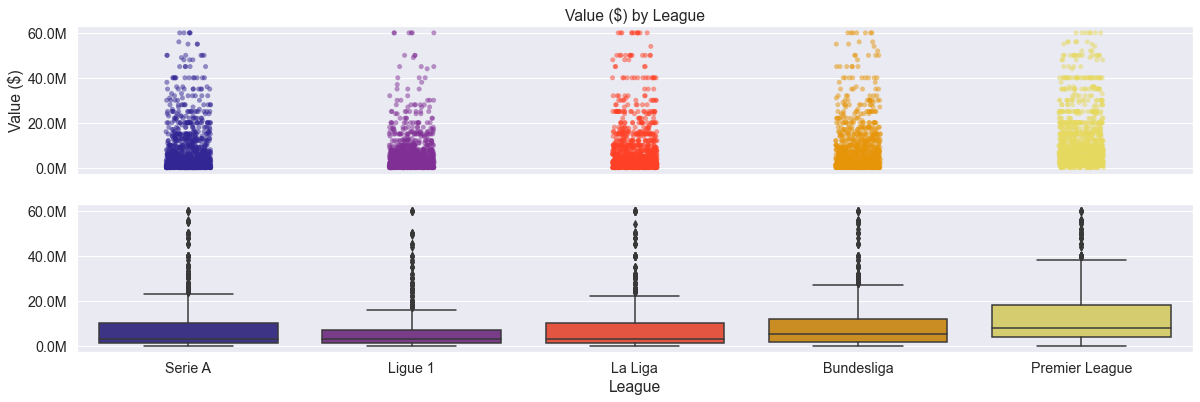

In [177]:
fig, ax = plt.subplots(2,1, sharex=True)

g = sns.stripplot(x="league", y="value", data=train_set, palette="CMRmap",
                ax=ax[0], alpha=0.5, jitter=True,)

ax[0].yaxis.set_major_formatter(formatter)

g.set_title("Value ($) by League")
g.set_ylabel('Value ($)')
g.set_xlabel('')

g = sns.boxplot(x="league", y="value", data=train_set, palette="CMRmap",
                ax=ax[1])

ax[1].yaxis.set_major_formatter(formatter)

g.set_xlabel('League')
g.set_ylabel('')


plt.show()

In [178]:
train_set = train_set.dropna(axis=0, subset=['foot'])

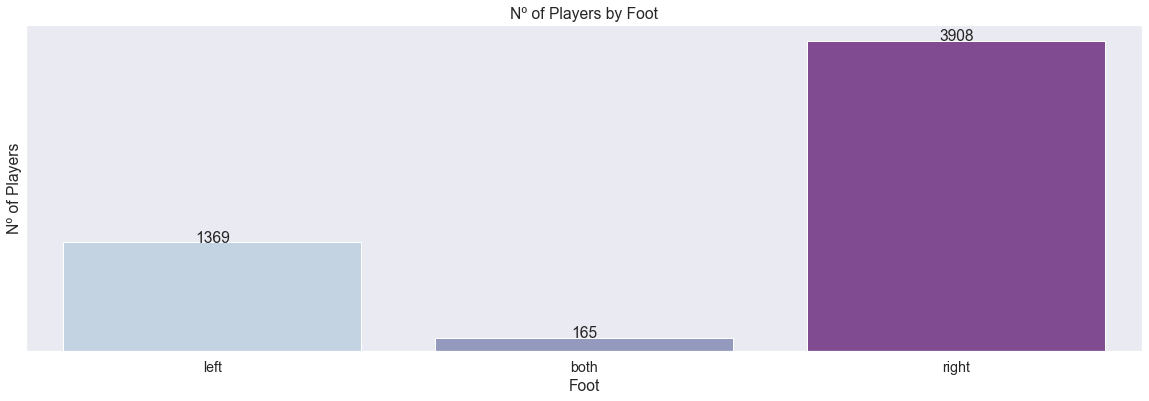

In [179]:
g = sns.countplot(x="foot", data=train_set, palette="BuPu", order=["left", "both", "right"])

g.set_title("Nº of Players by Foot")
g.set_ylabel('Nº of Players')
g.set_xlabel('Foot')
g.set(yticks=[])
show_values_on_bars(g, h_v="v")

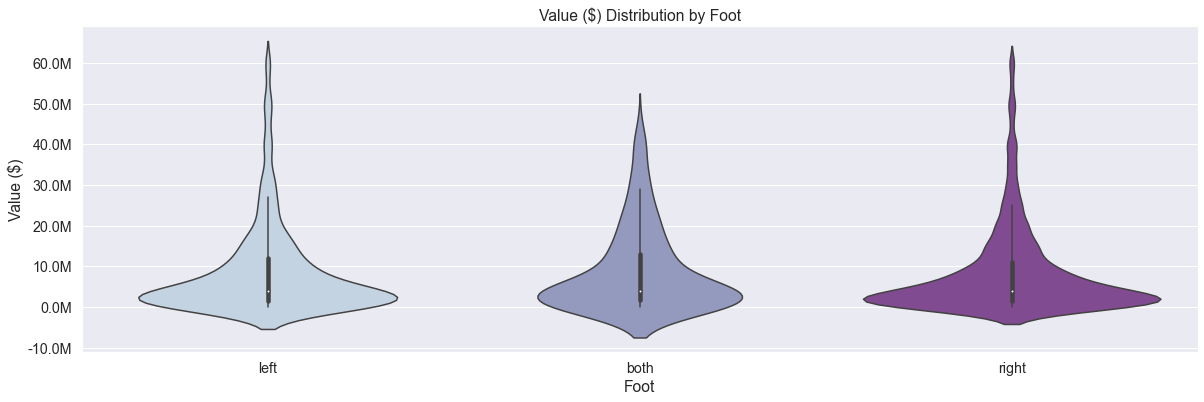

In [180]:
by_foot = train_set[["value", "foot"]].groupby("foot").mean()

fig, ax = plt.subplots(1,1)

g = sns.violinplot(x=train_set.foot, y=train_set.value, palette="BuPu", order=["left", "both", "right"],
                   ax=ax)

g.set_title("Value ($) Distribution by Foot")
g.set_ylabel('Value ($)')
g.set_xlabel('Foot')

ax.yaxis.set_major_formatter(formatter)

plt.show()

In [181]:
def format_Attendance(x):
    x = str(x)
    if ',' in x:
        return round(float(x.replace(',', '')))
    else:
        return round(float(x))

In [182]:
train_set["Attendance"] = train_set.Attendance.map(format_Attendance)

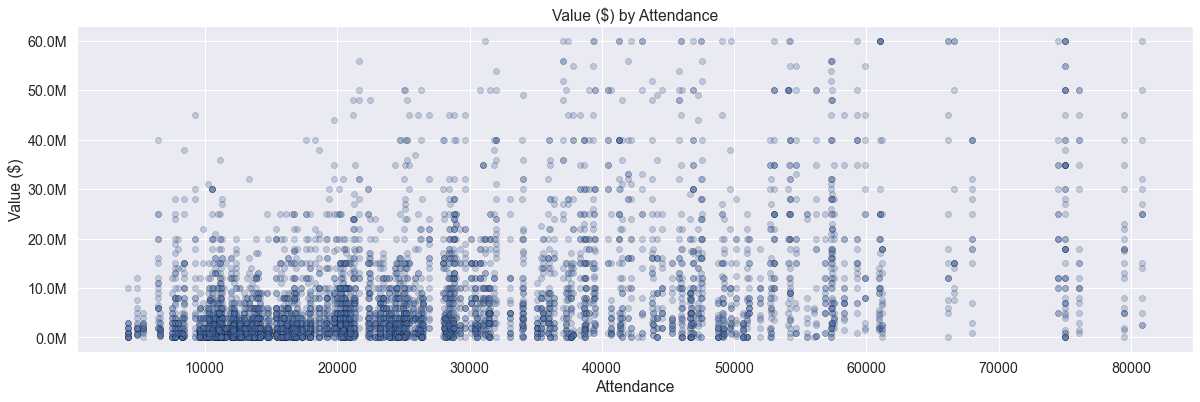

In [183]:
fig, ax = plt.subplots(1,1)

g = sns.scatterplot(x="Attendance", y="value", data=train_set, palette="BuPu", alpha=0.3,
                    x_jitter=True, y_jitter=True, edgecolor="black", ax=ax)

g.set_title("Value ($) by Attendance")
g.set_ylabel('Value ($)')
g.set_xlabel('Attendance')

ax.yaxis.set_major_formatter(formatter)

plt.show()


In [184]:
cat_cols = ["nationality", "position"]

### Numerical Data

In [185]:
def correlated(df, threshold, target):
    '''returns the columns of a dataframe whose correlation with the target is above the threshold'''
    corr = pd.Series(abs(df.corr()[target]) > threshold)
    corr_cols = corr.index[corr].tolist()
    corr_cols.remove(target)
    return corr_cols

num_cols = correlated(df_num, 0.3, 'value')

In [186]:
train_set[num_cols].describe()

,games,games_starts,minutes,goals,assists,xg,npxg,xa,minutes_90s,shots_total,...,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL
count,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,...,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000
mean,18.858140,14.770121,1325.555678,1.686880,1.198824,1.716207,1.558049,1.172290,14.717457,16.421904,...,49.688717,50.826902,-1.138184,49.468578,1.354956,47.908379,48.663635,-0.753896,-0.019046,0.169791
std,11.164708,11.167547,968.794051,3.030642,1.895781,2.701152,2.339665,1.582861,10.767323,20.031373,...,17.076757,13.106374,25.390145,16.723890,0.446695,12.340507,10.316195,18.590161,0.508648,0.375483
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,21.000000,-54.000000,13.000000,0.420000,26.800000,22.700000,-41.500000,-1.090000,0.000000
25%,9.000000,4.000000,446.250000,0.000000,0.000000,0.100000,0.100000,0.100000,5.000000,2.000000,...,37.000000,42.000000,-18.000000,38.000000,1.060000,39.200000,41.700000,-13.300000,-0.360000,0.000000
50%,19.000000,13.000000,1211.000000,0.000000,0.000000,0.700000,0.700000,0.600000,13.450000,9.000000,...,47.000000,51.000000,-4.000000,47.000000,1.290000,45.650000,48.500000,-3.500000,-0.095000,0.000000
75%,29.000000,24.000000,2105.750000,2.000000,2.000000,2.100000,1.900000,1.600000,23.400000,23.000000,...,58.000000,59.000000,13.000000,59.000000,1.610000,53.900000,55.400000,8.600000,0.260000,0.000000
max,38.000000,38.000000,3420.000000,36.000000,21.000000,27.000000,19.600000,13.900000,38.000000,178.000000,...,108.000000,85.000000,79.000000,100.000000,2.630000,93.000000,84.100000,58.300000,1.780000,1.000000


In [187]:
train_set[num_cols].isnull().sum().sum()

0

# Data Preparation

In [188]:
cat_cols

['nationality', 'position']

In [189]:
num_cols

['games',
 'games_starts',
 'minutes',
 'goals',
 'assists',
 'xg',
 'npxg',
 'xa',
 'minutes_90s',
 'shots_total',
 'shots_on_target',
 'shots_free_kicks',
 'passes_completed',
 'passes',
 'passes_total_distance',
 'passes_completed_short',
 'passes_short',
 'passes_completed_medium',
 'passes_medium',
 'assisted_shots',
 'passes_into_final_third',
 'passes_into_penalty_area',
 'progressive_passes',
 'passes_live',
 'through_balls',
 'passes_pressure',
 'passes_ground',
 'passes_right_foot',
 'passes_offsides',
 'passes_intercepted',
 'passes_blocked',
 'sca',
 'sca_passes_live',
 'sca_dribbles',
 'sca_shots',
 'sca_fouled',
 'gca',
 'gca_passes_live',
 'gca_dribbles',
 'gca_shots',
 'gca_fouled',
 'tackles_att_3rd',
 'pressures',
 'pressure_regains',
 'pressures_att_3rd',
 'touches',
 'touches_mid_3rd',
 'touches_att_3rd',
 'touches_att_pen_area',
 'touches_live_ball',
 'dribbles_completed',
 'dribbles',
 'players_dribbled_past',
 'nutmegs',
 'carries',
 'carry_distance',
 'carry_pro

In [191]:
X = df_train[num_cols + cat_cols]
y = df_train.value

### Categorical Attributes

In [192]:
train_set[cat_cols].isnull().sum().sum()

KeyError: "['position'] not in index"

In [193]:
from sklearn.base import BaseEstimator, TransformerMixin

class Prepare_Categorical_Data(BaseEstimator, TransformerMixin):
    def __init__(self, cat_cols):
        self.cat_cols = cat_cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['nationality'] = X["nationality"].map(format_nationality)
        X["nationality"] = X.nationality.map(lambda x: x if x in important_nations else "Other")
        X.position.replace('0', None, inplace=True)
        X['position_1'] = X.position.map(format_position_1)
        return X[cat_cols]

In [194]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

cat_pipe = Pipeline([
    ('prepare_cat', Prepare_Categorical_Data(cat_cols)),
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

### Numerical Attributes

In [195]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

In [196]:
from sklearn.compose import ColumnTransformer

data_prep_pipe = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

In [197]:
X_prep = data_prep_pipe.fit_transform(X)

# Modeling

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import reciprocal, expon
import joblib

In [106]:
def get_model(model_name, params):
    if model_name == "xgb":
        model = xgb.XGBRegressor(**params)
    elif model_name == "lgb":
        model = lgb.LGBMRegressor(**params)
    elif model_name == "svr":
        model = SVR(**params)
    else:
        model = RandomForestRegressor(**params)
    return model

def get_params(model_name):
    if model_name == "xgb":
        params = {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [3, 5, 7],
            "learning_rate": [1e-3, 1e-2, 1e-1, 0.5, 1.0],
        }
    elif model_name == "lgb":
        params = {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [3, 5, 7],
            "learning_rate": [1e-3, 1e-2, 1e-1, 0.5, 1.0],
        }
    elif model_name == "svr":
        params = {
            'kernel': ['linear', 'rbf'],
            'C': reciprocal(20, 200000),
            'gamma': expon(scale=1.0),
        }
    else:
        params = {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [3, 5, 7],
        }   
    return params
        

In [107]:
for model_name in ["xgb", "lgb", "svr", "rf"]:
    params = get_params(model_name)
    model = get_model(model_name, params)
    search = RandomizedSearchCV(model, params, cv=5, n_iter=10, 
                                scoring="neg_mean_squared_error",
                                random_state=42)
    search.fit(X_prep, y)
    best_score = np.sqrt(-search.best_score_)
    print("Best parameters for {}: {} with the score {:.2f}".format(model_name, search.best_params_, best_score))
    
    best_model = get_model(model_name, search.best_params_)

    # save the model to disk
    joblib.dump(best_model, "Models/%s.pkl" % model_name)

Best parameters for xgb: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1} with the score 7163287.62
Best parameters for lgb: {'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01} with the score 7193823.37
Best parameters for svr: {'C': 629.782329591372, 'gamma': 3.010121430917521, 'kernel': 'linear'} with the score 8889471.05
Best parameters for rf: {'n_estimators': 200, 'max_depth': 7} with the score 7395318.08


In [235]:
model_name = "xgb"

params = get_params(model_name)
model = get_model(model_name, params)
search = RandomizedSearchCV(model, params, cv=5, n_iter=50, 
                            scoring="neg_mean_squared_error",
                            random_state=42)
search.fit(X_prep, y)
best_score = np.sqrt(-search.best_score_)
print("Best parameters for {}: {} with the score {:.2f}".format(model_name, search.best_params_, best_score))

best_model = get_model(model_name, search.best_params_)

# save the model to disk
joblib.dump(best_model, "Models/best_%s.pkl" % model_name)

Best parameters for xgb: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1} with the score 9908241.23


In [237]:
pred_and_prep_pipe = Pipeline([
    ("data_prep", data_prep_pipe),
    ("best_model", search)
])

# Evaluating Test Data

In [244]:
from sklearn.metrics import mean_squared_error

y_test = test_set.value
X_test = test_set[num_cols + cat_cols]


test_preds = pred_and_prep_pipe.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("RMSE for test evaluation: {:.2f}".format(rmse))

RMSE for test evaluation: 9922389.33
